# Сборный проект:   
# Анализ факторов, определяющих успешность компьютерных игр

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Нужно выявить закономерности, определяющие успешность игры. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Данные за 2016 год могут быть неполными.

Цель исследования:   
Выявить и проанализировать ключевые факторы, влияющие на успешность компьютерных игр, используя исторические данные о продажах, оценках пользователей и экспертов, жанрах и платформах. На основе полученных результатов предложить рекомендации по выбору потенциально успешных продуктов и планированию рекламных кампаний для интернет-магазина «Стримчик» на 2017 год и последующие периоды.

План исследования

1. Общее изучение данных
2. Предобработка данных

3. Исследовательский анализ данных
- Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Как менялись продажи по платформам.
- Какие платформы лидируют по продажам, растут или падают?
- График «ящик с усами» по глобальным продажам игр в разбивке по платформам
- Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.
- Выводы с продажами игр на других платформах.
- Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

5. Портрет пользователя каждого региона
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

6. Проверка гипотез
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action

7. Общий вывод

Описание данных  
Name — название игры  
Platform — платформа  
Year_of_Release — год выпуска  
Genre — жанр игры  
NA_sales — продажи в Северной Америке (миллионы проданных копий)  
EU_sales — продажи в Европе (миллионы проданных копий)  
JP_sales — продажи в Японии (миллионы проданных копий)  
Other_sales — продажи в других странах (миллионы проданных копий)  
Critic_Score — оценка критиков (максимум 100)  
User_Score — оценка пользователей (максимум 10)  
Rating — рейтинг от организации ESRB. Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  

Стандартные системы рейтинга ESRB  

E (Everyone) - Для всех.  
E10+ (Everyone 10 and Older) - Для всех старше 10 лет.  
T (Teen) - Для подростков.  
M (Mature) - Для взрослых.  
AO (Adults Only) - Только для взрослых.  
RP (Rating Pending) - Рейтинг пока не определен.  
K-A' - "Kids to Adults для всех возрастов.  
EC' - "Early Childhood" для маленьких детей  

## Общее изучение информации

In [1]:
import pandas as pd  
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
from math import factorial
import warnings
warnings.filterwarnings("ignore")
#pd.set_option('display.max_rows', None) #добавили функции для отображения всех строк и столбцов при выводе
pd.option_context('mode.use_inf_as_na', True)

In [2]:
data = pd.read_csv('/datasets/games.csv')
#data = pd.read_csv('/Users/ekaterinakamorkina/Downloads/games.csv')

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
jp_sales = data[['JP_sales','Rating']]
rows_with_nan_in_col2 = jp_sales['Rating'].isna().sum()
rows_with_nan_in_col2

6766

In [6]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


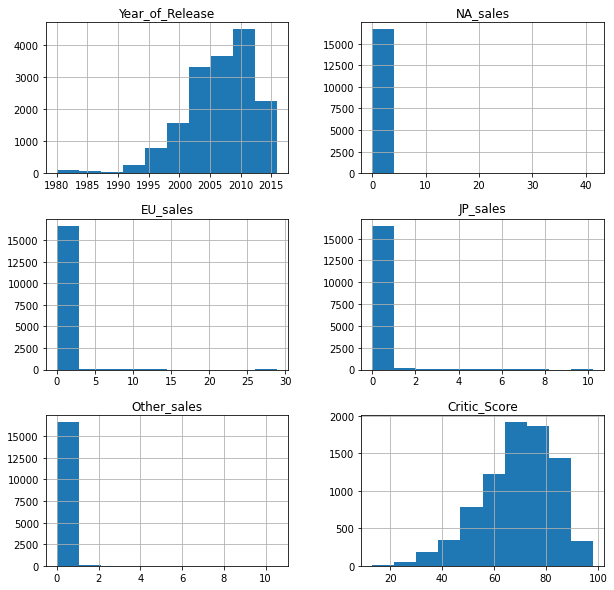

In [7]:
data.hist(figsize=(10, 10)); #Гистограмма с исходными данными.

Вывод. В начале подключила все библиотеки для успешной работы.  
Далее провела анализ общей информации  
В таблице  — 16715 строк и 11 столбцов

## Предобработка данных

In [8]:
data.columns = map(str.lower, data.columns)

Приведем к нижнему регистру названия столбцов 

### Обработка пропусков

In [9]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Пропуска в name и year,genre из-за колличества явно являются технической ошибкой. Их не так много, поэтому можно смело удалить

In [12]:
data_missed = data[data[['name', 'year_of_release', 'genre']].isnull().any(axis=1)]
sum_cmissed = data_missed[['na_sales', 'eu_sales', 'jp_sales']].sum() 
sum_cmissed 

na_sales    60.93
eu_sales    24.99
jp_sales     6.73
dtype: float64

In [13]:
data = data.dropna(subset=['name', 'year_of_release', 'genre'])

In [14]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

**Рассмотрим подробнее critic_score, user_score, rating**. Так как здесь огромное колличество пропусков

In [15]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Больше всего пропусков в critic_score. 

Возможные причины пропусков  
- Игры, особенно независимые или малобюджетные, могут не привлекать внимания крупных игровых изданий. Также, критики могут просто не успеть или не захотеть писать рецензии на все выходящие игры.
- Не все рейтинговые платформы используют рецензии критиков.

Поэтому заполнять пропуски, даже медианным значеним по регионам не корректно.
Заменим NAN на -1

In [16]:
data['critic_score']= data['critic_score'].fillna(-1)
data['critic_score'].unique()

array([76., -1., 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [17]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)



Возможные причины пропусков:
- Некоторые игры могут не иметь официального рейтинга ESRB, особенно если они не распространяются в регионах, где действует ESRB, или являются независимыми проектами.
- Критерии присвоения рейтинга могут изменяться со временем, что может влиять на результаты.

Использование медианного значения по регионам для заполнения пропусков может быть не лучшим решением. 
Заменим в категориальной переменной nan на unknown.

In [18]:
data['rating'] = data['rating'].fillna('unknown')
data['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [19]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В user_score присутствует значения 'tbd'. В контексте рейтингов пользователей, "TBD" обычно означает "To Be Determined" (будет определено). Это указывает на то, что значение рейтинга или оценка еще не установлены или еще не известны. Заменим на NAN

In [20]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)

Причины пропусков в оценках пользователях: 
- На супер новые игры, и пользователи еще не успели оставить свое мнение. 
- Некоторые игры могут распространяться через платформы, где отсутствует система сбора отзывов или рейтингов. 
- При сборе информации могут возникать ошибки, приводящие к некорректным значениям. 
- Некоторые пользователи не склонны оставлять оценку, даже если игра им понравилась.

Оценка пользователя не всегда объективная вещь. Кому-то нравится, кому-то абсолютно нет. Поэтому медианным значением абсолютно некорректно заполнять.

Заменим пропущенные значения на -1.

In [21]:
data['user_score'] = data['user_score'].fillna(-1)
data['user_score'].unique()

array(['8', -1, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

### Явные и неявные дубликаты

Для начала переведем значения столбцов Name и Genre в нижний регистр, чтобы исключить дубликаты с разным регистром

In [22]:
data['name']= data['name'].str.lower()
data['genre']= data['genre'].str.lower()
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,Wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,NES,1985.0,platform,29.08,3.58,6.81,0.77,-1.0,-1,unknown
2,mario kart wii,Wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,Wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,GB,1996.0,role-playing,11.27,8.89,10.22,1.00,-1.0,-1,unknown


In [23]:
data[data.duplicated ()]
#полных дубликатов не обнаружено

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Так как полных дубликатов необнаружено, проверим по трем главным столбцам: Имя, платформа, год релиза

In [24]:
data[data.duplicated(['name', 'platform', 'year_of_release'])].count()

name               1
platform           1
year_of_release    1
genre              1
na_sales           1
eu_sales           1
jp_sales           1
other_sales        1
critic_score       1
user_score         1
rating             1
dtype: int64

In [25]:
data[data.duplicated(['name', 'platform', 'year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,madden nfl 13,PS3,2012.0,sports,0.0,0.01,0.0,0.0,83.0,5.5,E


In [26]:
data = data.drop_duplicates(['name', 'platform', 'year_of_release']) #удаляем

In [27]:
data[data.duplicated(['name', 'platform', 'year_of_release'])].count()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

### Преобразуем данные в нужные типы

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  float64
 9   user_score       16443 non-null  object 
 10  rating           16443 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [29]:
data['year_of_release'] = data['year_of_release'].astype('int64')
data['user_score'] = data['user_score'].astype('float')

In [30]:
data.info() #проверяем корректность изменений

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  float64
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Суммарные продажи во всех регионах

In [31]:
data['total_sales']= data['na_sales']+ data['eu_sales'] + data['jp_sales']+data['other_sales']
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,NES,1985,platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown,40.24
2,mario kart wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknown,31.38


Вывод.  
Пропуски в столбцах name, year и genre, скорее всего, являются результатом технической ошибки. Поскольку их количество невелико, их можно удалить без значительных последствий.

Больше всего пропусков в critic_score (оценка критиков). Возможные причины:  
Игры, особенно независимые или малобюджетные, могут не привлекать внимание крупных игровых изданий. Критики также могут не успевать или не желать писать рецензии на все выходящие игры.

Также много пропущенных значений в user_score. Ведь некоторые игры могут распространяться через платформы, где отсутствует система сбора отзывов или рейтингов. Некоторые пользователи могут не оставлять оценки, даже если игра им понравилась. В процессе сбора информации могут возникать ошибки, приводящие к некорректным значениям.

Также можно объяснить большое количество пропусков в столбце «rating» (рейтинг от организации ESRB) тем, что некоторые игры могут не иметь официального рейтинга ESRB. Это особенно касается игр, которые не распространяются в регионах, где действует ESRB, или являются независимыми проектами.

Удалили дубликаты и посчитали суммарные продажи во всех регионах. Также преобразовали данные в нужные типы.

## Исследовательский анализ данных

### Cколько игр выпускалось в разные годы

Рост релизов игр начался с 1994 и достиг пика в 2007–2008. В середине 1990-х и начале 2000-х годов видеоигры стали массовым развлечением. Увеличение интереса со стороны широкой аудитории способствовало росту количества игр, выпускаемых на разных платформах. Тогда же были сделаны значительные достижения в инструментах разработки игр. 

После 2008 пошло уменьшение. Это объясняется тем, что с увеличением сложности технологий и графики, затраты на разработку игр возросли. Меньшие студии могли не справляться с финансовыми и техническими требованиями, что снизило общее количество релизов.

Данные до 1994 не важны, так как их немного и это уже устаревшие данные.

### Как менялись продажи по платформам?

In [34]:
data['platform'].value_counts()

PS2     2127
DS      2121
PS3     1305
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.

In [36]:
total_sales_top_ds = total_sales_top.query('year_of_release <1994') #оценили что было до 1994 года
total_sales_top_ds

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,strongest tokyo university shogi ds,DS,1985,action,0.0,0.0,0.02,0.0,-1.0,-1.0,unknown,0.02


На основание проанализированных данных выше и дальше чтоб построить прогноз на 2017 год - Возьмем  **за актуальный период 3 года**. C 2014 по 2016 год включительно.

In [38]:
actually_data = data.query('year_of_release >= 2014')
actually_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     1689 non-null   float64
 9   user_score       1689 non-null   float64
 10  rating           1689 non-null   object 
 11  total_sales      1689 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 171.5+ KB


In [39]:
actually_data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,call of duty: black ops 3,PS4,2015,shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,unknown,14.63
42,grand theft auto v,PS4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,pokemon omega ruby/pokemon alpha sapphire,3DS,2014,role-playing,4.35,3.49,3.10,0.74,-1.0,-1.0,unknown,11.68
77,fifa 16,PS4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,star wars battlefront (2015),PS4,2015,shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,unknown,7.98
92,call of duty: advanced warfare,PS4,2014,shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,fifa 17,PS4,2016,sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
96,super smash bros. for wii u and 3ds,3DS,2014,fighting,3.27,1.37,2.43,0.48,-1.0,-1.0,unknown,7.55
99,call of duty: black ops 3,XOne,2015,shooter,4.59,2.11,0.01,0.68,-1.0,-1.0,unknown,7.39
105,fallout 4,PS4,2015,role-playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


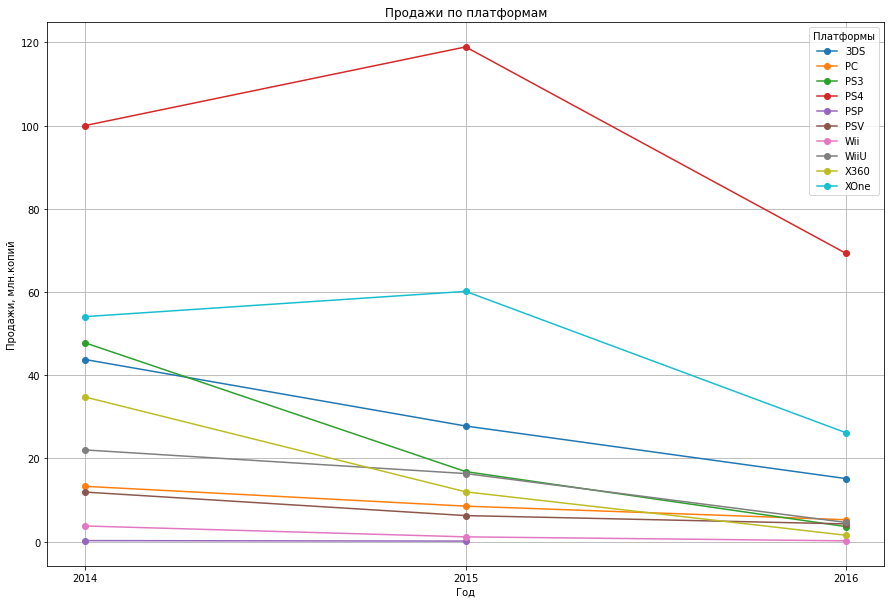

In [40]:
actually_sales_platform = actually_data.groupby(['platform', 'year_of_release']).sum().reset_index()
plt.figure(figsize=(15, 10)) 
for platform in actually_sales_platform['platform'].unique():
    platform_data = actually_sales_platform[actually_sales_platform['platform'] == platform]
    plt.plot(platform_data['year_of_release'], platform_data['total_sales'], marker='o', label=platform)
plt.xlabel('Год')
plt.ylabel('Продажи, млн.копий')
plt.title('Продажи по платформам')
plt.legend(title='Платформы')
plt.grid(True)
plt.xticks(ticks=actually_sales_platform['year_of_release'].unique())
plt.show()

Для начала надо отметить, что данные за 2016 год неполные, поэтому корректность данных нарушена. Но и не учитывать 2016 год для прогноза на 2017 нельзя. 

Потенциально прибыльные платформы на 2017 год сложно оценить. В 2014-2016 годах PS4 стала лидером по продажам среди платформ, опережая всех. PS4 завоевала наибольшую популярность благодаря своим эксклюзивным играм, а также более доступной цене. Но даже на них падает спрос по сравнению с 2015. Это связано с тем, что активный цикл использования консоли подходит к концу, и в 2016 вышли новые консоли PlayStation 4 Slim, а также в конце года PlayStation 4 Pro.

XOne занимала второе место, но с некоторым отставанием от PS4. PS3 показывала стабильные продажи, но в сравнении с предыдущими годами они уже были ниже. 3DS оставалась популярной платформой благодаря своей портативности и обширной библиотеке игр. X360 уже завершал свой жизненный цикл и демонстрировал снижение продаж.

В 2014-2016 годах продажи Wii заметно снизились по сравнению с ее пиком популярности в предыдущие годы. Это связано с выходом новых консолей, таких как PS4 и XOne. Несмотря на это, Wii все еще была популярной платформой, особенно среди семейных игроков, благодаря своей доступной цене и доступной библиотеке игр.

**Построим «ящик с усами» по глобальным продажам игр в разбивке по платформам** 


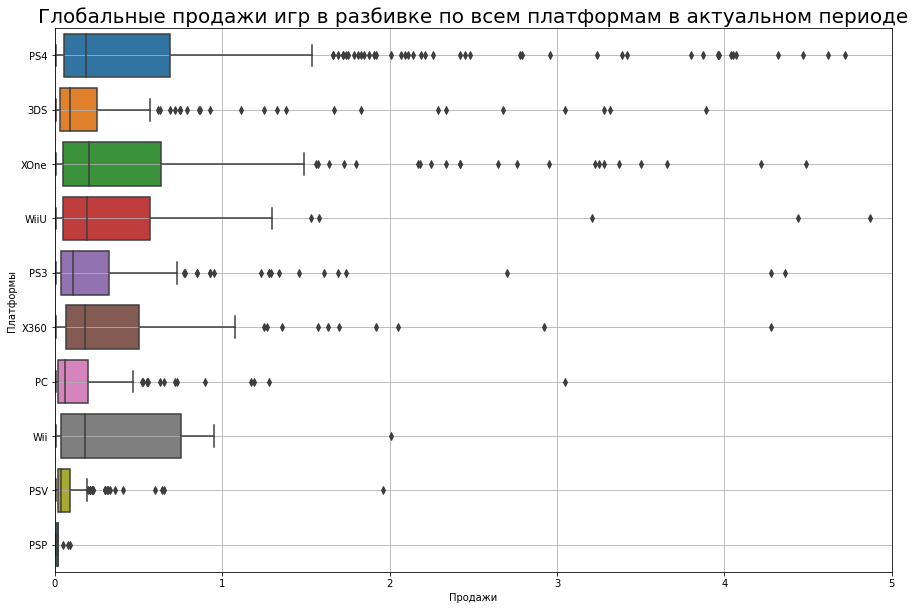

In [41]:
plt.figure(figsize=(15,10))
plt.xlim(0, 5)
sns.boxplot(x="total_sales", y="platform", data=actually_data.reset_index())
plt.title('Глобальные продажи игр в разбивке по всем платформам в актуальном периоде', fontsize=20)
plt.ylabel('Платформы')
plt.xlabel('Продажи')
plt.grid(True);

Для наглядности выберем платформы с самыми большими продажами: PS4, XboxOne, Wii, PS3, Xbox 360.

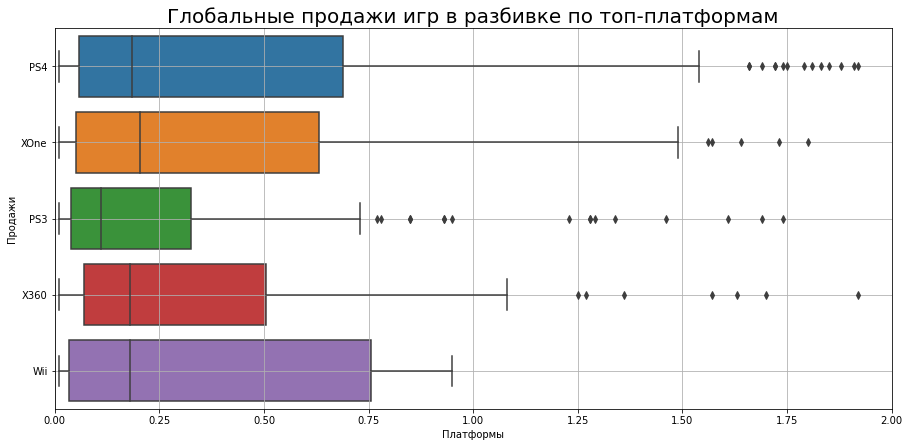

In [42]:
actually_data_top_platform = actually_data.query('platform == "PS4" or platform == "XOne" or platform == "PS3" or platform == "Wii" or platform == "X360"')
plt.figure(figsize=(15, 7))
plt.xlim(0, 2)
plt.title('Глобальные продажи игр в разбивке по топ-платформам', fontsize=20)
sns.boxplot(x='total_sales', y='platform', data=actually_data_top_platform , orient='h')
plt.ylabel('Продажи')
plt.xlabel('Платформы')
plt.grid(True);

На ящике с усами видно продажи Wii и PS4 за период 2014-2016 годов примерно одинаковы. Но у Wii нет выбросов и boxplot короче.  

Отсутствие выбросов у Wii говорит о том, что ее продажи были более стабильными, без резких скачков или падений. Потому что Wii была ориентирована на семейную аудиторию, которая, как правило, стабильнее в своих игровых привычках. Тогда как PS4 была более мощной консолью, ориентированной на хардкорных геймеров. Также продажи PS4 могли быть подвержены влиянию выхода новых игр.
После Wii и PS4 идет XOne. Выбросов как у PS4, но продаж меньше   
Продажи X360 были еще меньше, чем у предыдущих консолей, поскольку консоль уже находилась на закате своей популярности.



**Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков?**  

Берем для анализа PS и уберем все строки где оценки критиков и пользователей -1

In [43]:
actually_data_not_zero= actually_data_top_platform.query('(critic_score == 0) or (user_score ==0)')
actually_data_not_zero

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


In [44]:
actually_data_ps = actually_data_top_platform.query('(platform == "PS4") & ((user_score != -1) or (critic_score != -1))')
actually_data_ps  

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,grand theft auto v,PS4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,fifa 16,PS4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
92,call of duty: advanced warfare,PS4,2014,shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,fifa 17,PS4,2016,sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
105,fallout 4,PS4,2015,role-playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17
...,...,...,...,...,...,...,...,...,...,...,...,...
16486,super dungeon bros,PS4,2016,action,0.01,0.00,0.00,0.00,42.0,2.3,E10+,0.01
16499,sherlock holmes: the devil's daughter,PS4,2016,adventure,0.01,0.00,0.00,0.00,70.0,6.8,T,0.01
16500,root letter,PS4,2016,adventure,0.00,0.00,0.01,0.00,69.0,7.5,unknown,0.01
16526,dungeons 2,PS4,2016,role-playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01


In [45]:
# check
actually_data_ps.sort_values('user_score')[:2]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15021,assault suit leynos,PS4,2016,shooter,0.02,0.0,0.0,0.00,67.0,-1.0,E10+,0.02
14294,just dance 2017,PS4,2016,misc,0.02,0.0,0.0,0.01,73.0,-1.0,E10+,0.03


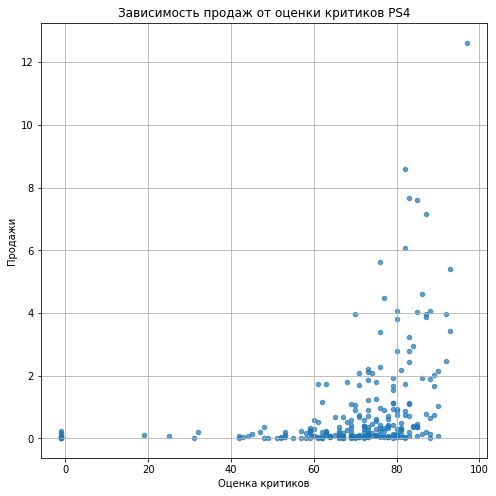

In [46]:
actually_data_ps.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.7, figsize=(8, 8))
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи')
plt.title('Зависимость продаж от оценки критиков PS4')
plt.grid(True);

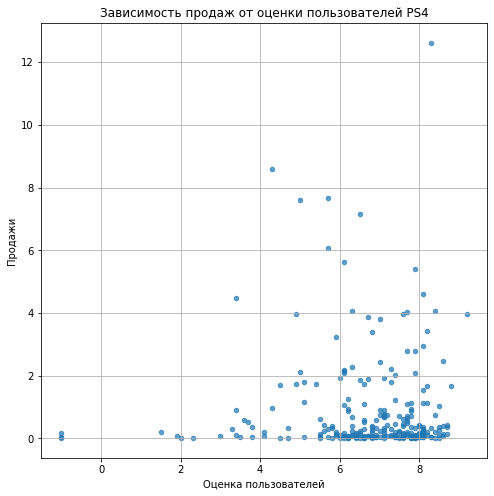

In [47]:
actually_data_ps.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.7, figsize=(8, 8))
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи')
plt.title('Зависимость продаж от оценки пользователей PS4')
plt.grid(True);

In [48]:
critic_actually_data_ps = actually_data_ps['total_sales'].corr(actually_data_ps['critic_score'])
user_actually_data_ps = actually_data_ps['total_sales'].corr(actually_data_ps['user_score'])
print ('Коэффицент корреляции для отзывов критиков по платформе PS4:', critic_actually_data_ps)
print ('Коэффицент корреляции для отзывов пользователй по платформе PS4:', user_actually_data_ps)

Коэффицент корреляции для отзывов критиков по платформе PS4: 0.3395541059336603
Коэффицент корреляции для отзывов пользователй по платформе PS4: -0.004302340842328471


Нет статистически значимой связи между продажами игр на платформе PS и отзывами пользователей. Однако существует среднеположительная связь между продажами и отзывами критиков. Это свидетельствует о том, что мнение критиков оказывает большее влияние на продажи игр.

**Соотнесем выводы с продажами игр на других платформах.**

Добавим все предыдущие шаги в функцию

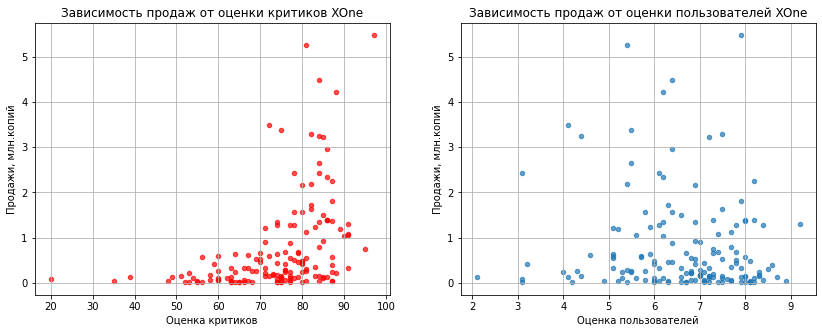

Коэффициент корреляции для отзывов критиков по платформе XOne: 0.42
Коэффициент корреляции для отзывов пользователей по платформе XOne: -0.09


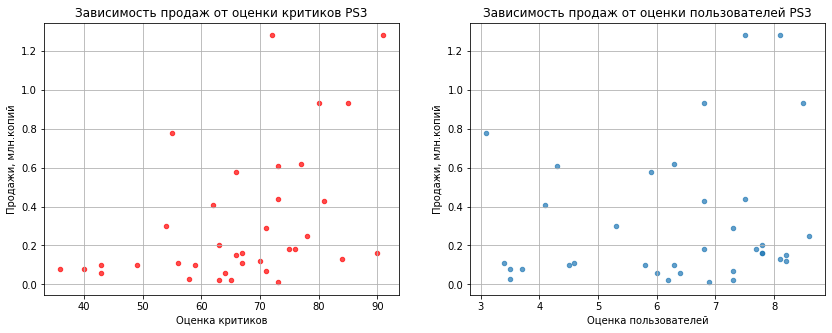

Коэффициент корреляции для отзывов критиков по платформе PS3: 0.45
Коэффициент корреляции для отзывов пользователей по платформе PS3: 0.16


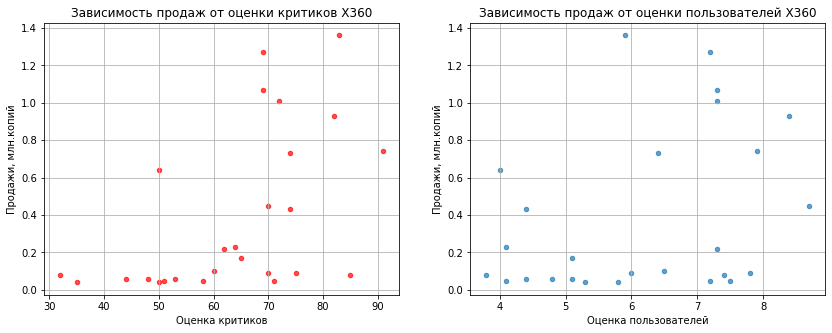

Коэффициент корреляции для отзывов критиков по платформе X360: 0.53
Коэффициент корреляции для отзывов пользователей по платформе X360: 0.34


In [49]:
def actually_data_total_platform(data, platform):
    filtered_data = actually_data_top_platform.query(
        f'(platform == "{platform}") & (user_score != -1) & (user_score != 0) & (critic_score != -1) & (critic_score != 0)')
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    filtered_data.plot(x='critic_score', y='total_sales', kind='scatter', color='red', alpha=0.7, ax=plt.gca())
    plt.xlabel('Оценка критиков')
    plt.ylabel('Продажи, млн.копий')
    plt.title(f'Зависимость продаж от оценки критиков {platform}')
    plt.grid(True)
    plt.subplot(1, 2, 2)
    filtered_data.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.7, ax=plt.gca())
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Продажи, млн.копий')
    plt.title(f'Зависимость продаж от оценки пользователей {platform}')
    plt.grid(True)
    plt.show()
    critic_corr = filtered_data['total_sales'].corr(filtered_data['critic_score'])
    user_corr = filtered_data['total_sales'].corr(filtered_data['user_score'])
    print(f'Коэффициент корреляции для отзывов критиков по платформе {platform}: {critic_corr:.2f}')
    print(f'Коэффициент корреляции для отзывов пользователей по платформе {platform}: {user_corr:.2f}')

platforms = ["XOne", "PS3", "X360"]
for platform in platforms:
    actually_data_total_platform(actually_data_top_platform, platform)

C XOne такая же ситуация, как и с PS4. Нет статистически значимой связи между продажами игр на платформе и отзывами пользователей.
У PS3 слабая положительная зависимость продаж от отзывов пользователей. Но у X360 среднеположительная связь с пользователями, а c отзывами критиков у X360 уже высокоположительная связь с продажами.

Вывод: В целом мнение критиков имеет средне положительную связь и оказывает значительно большее влияние по сравнению с оценками пользователей.

### Общее распределение игр по жанрам

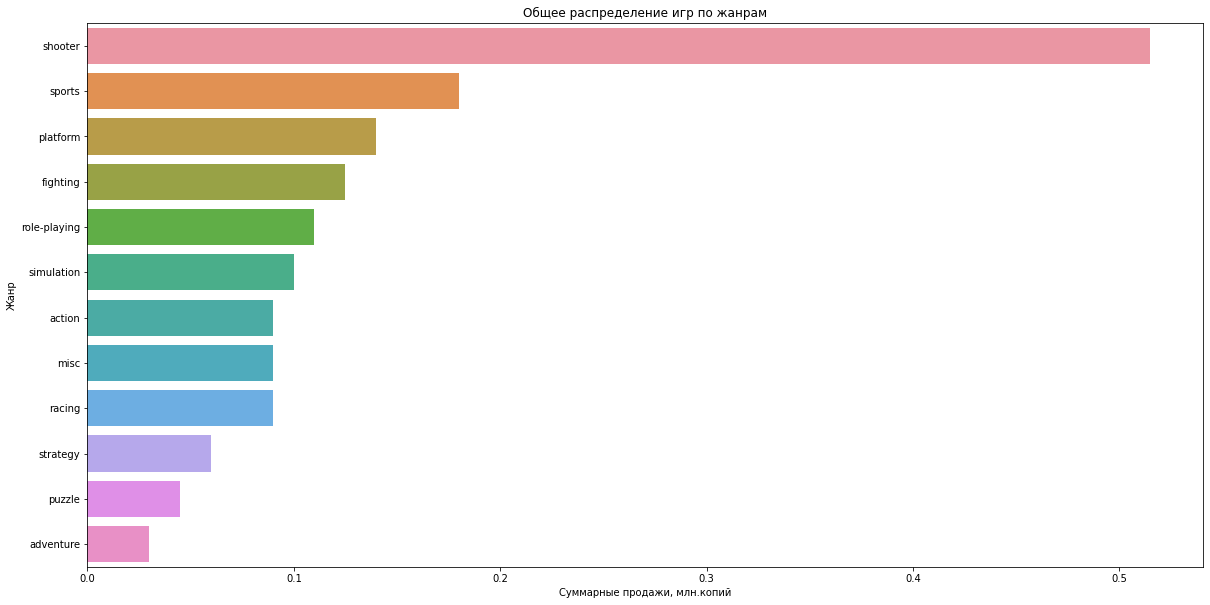

In [50]:
genre_data = actually_data.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values(by='total_sales', ascending=False).reset_index()
plt.figure(figsize=(20, 10))
sns.barplot(x='total_sales', y='genre', data=genre_data)
plt.title('Общее распределение игр по жанрам')
plt.xlabel('Суммарные продажи, млн.копий')
plt.ylabel('Жанр');

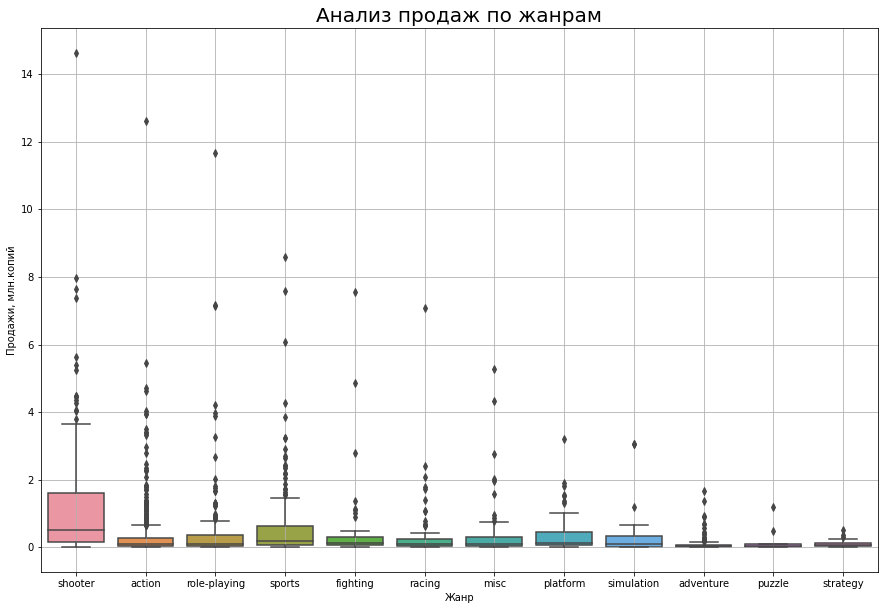

In [51]:
plt.figure(figsize=(15, 10))
plt.xlim(0, 2)
plt.title('Анализ продаж по жанрам', fontsize=20)
sns.boxplot(x='genre', y='total_sales', data=actually_data)
plt.ylabel('Продажи, млн.копий')
plt.xlabel('Жанр')
plt.grid(True);

<div class="alert alert-dan ger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />        
К сожалению, на этом графике видны только выбросы, и совсем не видны медиана и 75% квантиль. Для более обоснованных выводов cтоит добавить второй вид, с другим масштабом по оси y, где будет отображена только нижняя часть boxplot-ов
       
Оба вида важны, т.к. выбросы — это наши звезды, которые приносят максимум выручки
        


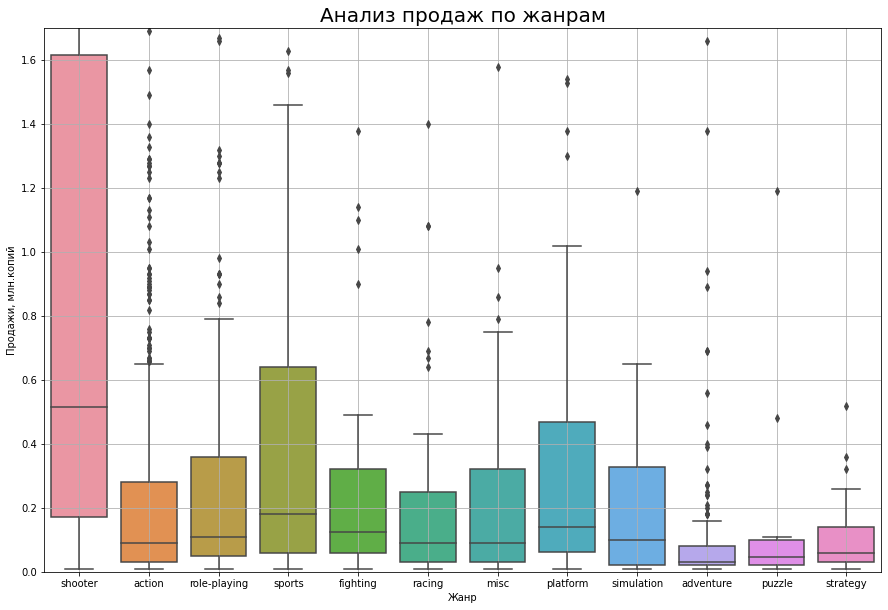

In [52]:
plt.figure(figsize=(15, 10))
plt.xlim(0, 2)
plt.ylim(0,1.7)
plt.title('Анализ продаж по жанрам', fontsize=20)
sns.boxplot(x='genre', y='total_sales', data=actually_data)
plt.ylabel('Продажи, млн.копий')
plt.xlabel('Жанр')
plt.grid(True);

У shooter медиана около 0.55 млн.копий. Q1 - 0.19, Q3-1,6 млн.копий. Это говорит о том, что в жанре Shooter есть как очень успешные игры, так и игры с очень низкими продажами, то есть разброс по продажам  значителен. 

На втором месте по медиане жанр 'sports' - 0.19 млн.копий., Q1 - 0.1 и Q3 - 0.65 млн.копий.  
Далее идет 'platform' c медианой 0.17 млн.копий, Q1 - 0.1 и Q3 - 0.45 млн.копий.

Как видим первая тройка является самой прибильной для компании.

**Наиболее прибыльный жанр shooter**. Он лидер продаж в период с 2014 по 2016 год. Шутеры, как правило, включают в себя интенсивные боевые действия с использованием различного оружия и техники. Игры с многопользовательскими режимами и активными онлайновыми сообществами способствуют высоким продажам в этом жанре.

Жанр Sports располагается на втором месте по продажам. Спортивные игры часто выпускаются с обновлениями по мере изменения спортивных сезонов, что поддерживает интерес к ним на протяжении года.

Жанры Strategy и Puzzle, adventure имеют наименьшие показатели продаж по сравнению со всеми жанрами.
Strategy и adventure: Игры стратегического жанра могут требовать более сложного и долгого вовлечения, что может ограничивать их привлекательность для широкой аудитории.
Puzzle: Головоломки часто рассматриваются как игры для более кратковременного использования или отдыха, что может снижать их общие продажи по сравнению с более динамичными и насыщенными жанрами.


**Вывод**

- Рост релизов игр начался с 1994 и достиг пика в 2007–2008 и составил 1400 игр.
- После 2008 года наблюдается снижение числа продаж видеоигр. Это явление можно объяснить возрастанием сложности технологий и графики, что привело к увеличению затрат на разработку игр. В результате, меньшие студии, не обладая достаточными финансовыми и техническими ресурсами, сталкивались с трудностями, что снижало их способность выпускать новые игры. Эти факторы в совокупности способствовали общему снижению числа релизов в индустрии видеоигр.
**Наиболее прибыльный жанр — shooter**. Он лидер продаж в период с 2014 по 2016 год. Шутеры, как правило, включают в себя интенсивные боевые действия с использованием различного оружия и техники. Игры с многопользовательскими режимами и активными онлайновыми сообществами способствуют высоким продажам в этом жанре.

Жанр Sports располагается на втором месте по продажам. Спортивные игры часто выпускаются с обновлениями по мере изменения спортивных сезонов, что поддерживает интерес к ним на протяжении года.

Жанры Strategy и Puzzle, adventure имеют наименьшие показатели продаж по сравнению со всеми жанрами.
Strategy и adventure: Игры стратегического жанра могут требовать более сложного и долгого вовлечения, что может ограничивать их привлекательность для широкой аудитории.
Puzzle: Головоломки часто рассматриваются как игры для более кратковременного использования или отдыха, что может снижать их общие продажи по сравнению с более динамичными и насыщенными жанрами.
- С 1994 по 1999 год доминировала только PlayStation. Выпуск PlayStation 2 в 2000 году привел к её популярности до 2006 года, когда PlayStation 3 начала набирать популярность. В 2008 году наибольшие продажи отмечались у Xbox 360, а Wii занимала второе место.

- Средний жизненный цикл консоли составляет около 11 лет. Это включает период активного использования, который длится от 4 до 5 лет, а затем период поддержки и постепенного снижения активности, который продолжается еще несколько лет.

- Актуальный период 3 года. C 2014 по 2016 год включительно.

- Мнение критиков оказывает значительно большее влияние на продажи игр по сравнению с оценками пользователей.
- В период с 2014 по 2016 год Shooter наиболее прибыльный жанр из-за динамичного геймплея и многопользовательского режима.
- Жанры Strategy и Puzzle, adventure демонстрируют наименьшие показатели продаж по сравнению со всеми жанрами.

## Портрет пользователя каждого региона

### Самые популярные платформы (топ-5)

Топ-5 платформ в Северной Америке


,Платформа,"Продажи, млн копий","Доля, %"
1,PS4,98.61,34.7
2,XOne,81.27,28.6
3,X360,28.30,10.0
4,3DS,22.64,8.0
5,PS3,22.05,7.8
-,Другие,31.19,11.0


Топ-5 платформ в Европе


,Платформа,"Продажи, млн копий","Доля, %"
1,PS4,130.04,48.0
2,XOne,46.25,17.1
3,PS3,25.54,9.4
4,PC,17.97,6.6
5,3DS,16.12,6.0
-,Другие,34.76,12.8


Топ-5 платформ в Японии


,Платформа,"Продажи, млн копий","Доля, %"
1,3DS,44.24,47.5
2,PS4,15.02,16.1
3,PSV,14.54,15.6
4,PS3,11.22,12.1
5,WiiU,7.31,7.9
-,Другие,0.76,0.8


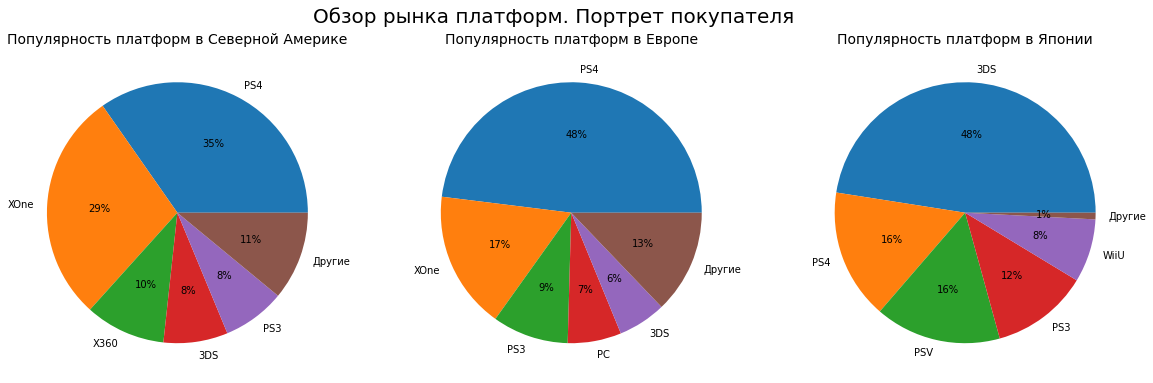

In [53]:
def each_region_platform(data, region_sales_col, region_name):
    platform_sales = actually_data.pivot_table(index='platform', values=region_sales_col, 
                                      aggfunc='sum').sort_values(region_sales_col, ascending=False).reset_index()
    top_5_platforms = platform_sales.head(5)
    total_sales = platform_sales[region_sales_col].sum()
    top_5_sales = top_5_platforms[region_sales_col].sum()
    other_sales = total_sales - top_5_sales

    other_row = pd.DataFrame({'platform': ['Другие'], region_sales_col: [other_sales]})
    combined_platforms = pd.concat([top_5_platforms, other_row])
    combined_platforms['share'] = (combined_platforms[region_sales_col] / total_sales * 100).round(1)
    combined_platforms.columns = ['Платформа', 'Продажи, млн копий', 'Доля, %']
    combined_platforms.index = list(range(1, 6)) + ['-']
    print(f'Топ-5 платформ в {region_name}')
    display(combined_platforms)
    return combined_platforms

# Для всех регионов
na_data = each_region_platform(actually_data, 'na_sales', 'Северной Америке')
eu_data = each_region_platform(actually_data, 'eu_sales', 'Европе')
jp_data = each_region_platform(actually_data, 'jp_sales', 'Японии')
#Сет из 3 графиков
f,axs = plt.subplots(1, 3, figsize=(20, 6))
f.suptitle('Обзор рынка платформ. Портрет покупателя', fontsize=20)
axs[0].set_title('Популярность платформ в Северной Америке', fontsize=14)
axs[1].set_title('Популярность платформ в Европе', fontsize=14)
axs[2].set_title('Популярность платформ в Японии', fontsize=14)
axs[0].pie(na_data['Продажи, млн копий'], labels=na_data['Платформа'], autopct='%1.0f%%')
axs[1].pie(eu_data['Продажи, млн копий'], labels=eu_data['Платформа'], autopct='%1.0f%%')
axs[2].pie(jp_data['Продажи, млн копий'], labels=jp_data['Платформа'], autopct='%1.0f%%')
plt.show()

В 2014-2016 годах PS4 лидировала в Северной Америке и в Европе, а в Японии не пользовалась такой популярностью. Почти половину рынка забрала в Японии 3DS. Вероятно, потому что Nintendo предложила привлекательные игры и эксклюзивные тайтлы в Японии для 3DS, что сделало её популярной среди японских геймеров. Также Nintendo была очень успешна на японском рынке с предыдущими поколениями консолей и продолжала удерживать большую долю рынка благодаря своей репутации и успешным играм.

Тогда как в Северной Америке и Европе были созданы крупные сообщества геймеров PS4, заинтересованных в новых консолях, что способствовало популярности PS4.

### Самые популярные жанры (топ-5)

Топ-5 жанров в Северной Америке


,Жанр,"Продажи, млн копий","Доля, %"
1,shooter,79.02,27.8
2,action,72.53,25.5
3,sports,46.13,16.2
4,role-playing,33.47,11.8
5,misc,15.05,5.3
-,Другие,37.86,13.3


Топ-5 жанров в Европе


,Жанр,"Продажи, млн копий","Доля, %"
1,action,74.68,27.6
2,shooter,65.52,24.2
3,sports,45.73,16.9
4,role-playing,28.17,10.4
5,racing,14.13,5.2
-,Другие,42.45,15.7


Топ-5 жанров в Японии


,Жанр,"Продажи, млн копий","Доля, %"
1,role-playing,31.16,33.5
2,action,29.58,31.8
3,fighting,6.37,6.8
4,misc,5.61,6.0
5,shooter,4.87,5.2
-,Другие,15.50,16.7


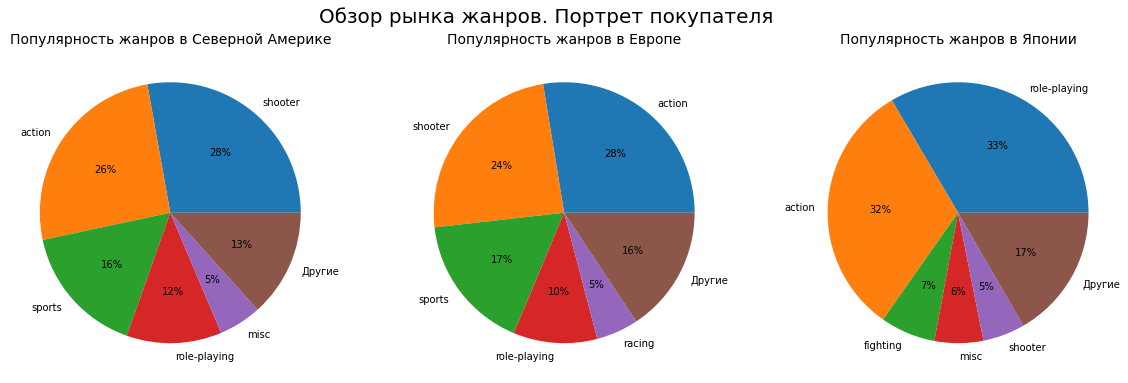

In [54]:
def each_region_genre(data, region_sales_col, region_name):
    genre_sales = actually_data.pivot_table(index='genre', values=region_sales_col, 
                                      aggfunc='sum').sort_values(region_sales_col, ascending=False).reset_index()
    top_5_genre = genre_sales.head(5)
    total_sales = genre_sales[region_sales_col].sum()
    top_5_sales = top_5_genre[region_sales_col].sum()
    other_sales = total_sales - top_5_sales

    other_row = pd.DataFrame({'genre': ['Другие'], region_sales_col: [other_sales]})
    combined_genre = pd.concat([top_5_genre, other_row])
    combined_genre['share'] = (combined_genre[region_sales_col] / total_sales * 100).round(1)
    combined_genre.columns = ['Жанр', 'Продажи, млн копий', 'Доля, %']
    combined_genre.index = list(range(1, 6)) + ['-']
    print(f'Топ-5 жанров в {region_name}')
    display(combined_genre)
    return combined_genre

# Для всех регионов
na_data = each_region_genre(actually_data, 'na_sales', 'Северной Америке')
eu_data = each_region_genre(actually_data, 'eu_sales', 'Европе')
jp_data = each_region_genre(actually_data, 'jp_sales', 'Японии')
#Сет из 3 графиков
f,axs = plt.subplots(1, 3, figsize=(20, 6))
f.suptitle('Обзор рынка жанров. Портрет покупателя', fontsize=20)
axs[0].set_title('Популярность жанров в Северной Америке', fontsize=14)
axs[1].set_title('Популярность жанров в Европе', fontsize=14)
axs[2].set_title('Популярность жанров в Японии', fontsize=14)
axs[0].pie(na_data['Продажи, млн копий'], labels=na_data['Жанр'], autopct='%1.0f%%')
axs[1].pie(eu_data['Продажи, млн копий'], labels=eu_data['Жанр'], autopct='%1.0f%%')
axs[2].pie(jp_data['Продажи, млн копий'], labels=jp_data['Жанр'], autopct='%1.0f%%')
plt.show()

Shooter и action лидируют в Северной Америке и в Европе. Тогда как в Японии лидер совсем другой — role-playing. Это может быть связано с популярностью в Японии аниме и манги, которые часто исследуют темы, аналогичные тем, что встречаются в RPG. Японские RPG часто славятся высоким качеством графики, музыкального сопровождения и сценарного наполнения. 

В Северной Америке и Европе аудитория для видеоигр часто ценит экшен и шутеры за их развлекательность и высокую реиграбельность.
Игры-шутеры, такие как Call of Duty, Battlefield и Halo, были чрезвычайно популярны в Северной Америке и Европе, предлагая многопользовательский режим и постоянные обновления, что поддерживало интерес игроков.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

E (Everyone) - Для всех.  
E10+ (Everyone 10 and Older) - Для всех старше 10 лет.  
T (Teen) - Для подростков.  
M (Mature) - Для взрослых.  
AO (Adults Only) - Только для взрослых.  
RP (Rating Pending) - Рейтинг пока не определен.  
K-A' - "Kids to Adults для всех возрастов.  
EC' - "Early Childhood" для маленьких детей  

Топ-5 жанров в Северной Америке


,Рейтинг,"Продажи, млн копий","Доля, %"
1,M,96.42,44.0
2,E,50.74,23.1
3,T,38.95,17.8
4,E10+,33.23,15.1


Топ-5 жанров в Европе


,Рейтинг,"Продажи, млн копий","Доля, %"
1,M,93.44,44.1
2,E,58.06,27.4
3,T,34.07,16.1
4,E10+,26.16,12.4


Топ-5 жанров в Японии


,Рейтинг,"Продажи, млн копий","Доля, %"
1,T,14.78,40.8
2,E,8.94,24.7
3,M,8.01,22.1
4,E10+,4.46,12.3


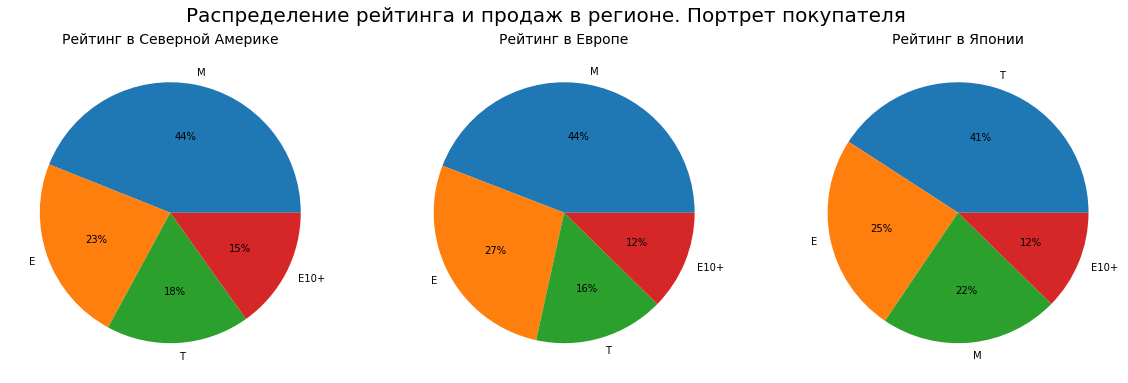

In [55]:
def each_region_rating(data, region_sales_col, region_name):
    rating_sales = data.pivot_table(index='rating', values=region_sales_col, aggfunc='sum').sort_values(region_sales_col, ascending=False).reset_index()
    rating_sales = rating_sales.query('rating != "unknown"')
    top_5_rating = rating_sales.head(5)
    total_sales_rating = rating_sales[region_sales_col].sum()
    top_5_sales_rating = top_5_rating[region_sales_col].sum()
    combined_rating = pd.concat([top_5_rating])
    combined_rating['share'] = (combined_rating[region_sales_col] / total_sales_rating * 100).round(1)
    combined_rating.columns = ['Рейтинг', 'Продажи, млн копий', 'Доля, %']
    combined_rating.index = list(range(1, 5))
    print(f'Топ-5 жанров в {region_name}')
    display(combined_rating)
    return combined_rating

# Для всех регионов
na_data = each_region_rating(actually_data, 'na_sales', 'Северной Америке')
eu_data = each_region_rating(actually_data, 'eu_sales', 'Европе')
jp_data = each_region_rating(actually_data, 'jp_sales', 'Японии')

#Сет из 3 графиков
f,axs = plt.subplots(1, 3, figsize=(20, 6))
f.suptitle('Распределение рейтинга и продаж в регионе. Портрет покупателя', fontsize=20)
axs[0].set_title('Рейтинг в Северной Америке', fontsize=14)
axs[1].set_title('Рейтинг в Европе', fontsize=14)
axs[2].set_title('Рейтинг в Японии', fontsize=14)
axs[0].pie(na_data['Продажи, млн копий'], labels=na_data['Рейтинг'], autopct='%1.0f%%')
axs[1].pie(eu_data['Продажи, млн копий'], labels=eu_data['Рейтинг'], autopct='%1.0f%%')
axs[2].pie(jp_data['Продажи, млн копий'], labels=jp_data['Рейтинг'], autopct='%1.0f%%')
plt.show()

В исследуемом периоде в Северной Америке и в Европе преобладают игры категории для взрослых. Это потому что популярные шутеры и экшен-игры часто имеют рейтинг для взрослых из-за насилия и других зрелых тем.  
А в Японии преобладают игры для подростков (41%). Японские игры часто черпают вдохновение из аниме, которые традиционно ориентированы на более молодую аудиторию.  

На втором месте во всех регионах игры для всех возрастов. Ведь игры, в которые можно играть всей семьей или в группе друзей, часто получают широкую популярность благодаря своей универсальности.

**Вывод**

Создали портрет пользователя каждого региона. Надо сразу заметить, что портреты в Северной Америке с Европой очень схожи. Японский пользователь отличается по многим параметрам. 

Американский пользователь чаще использует PS4, чуть реже XOne. Предпочитает играть в shooter, а меньше всего играет в головоломки и стратегии. Предпочтения по взрослым типам игр.

Половина всех европейских пользователей использует PS4. Любит играть в action, чуть меньше в shooter. На 5 месте жанр игр — гонки. Также предпочитают игры с пометкой «для взрослых».

Японский пользователь совсем другой. Половина геймеров всей Японии играет в Nintendo 3DS. Основной контингент — это подростки, которые любят играть в role-playing либо в action.

## Проверка гипотез

Нулевая гипотеза - это гипотеза, которую мы хотим проверить и оспорить. Обычно это гипотеза о том, что нет разницы  
Альтернативная гипотеза - противоположная нулевой гипотезе. Она предполагает наличие разницы.

Берем P-value = 0,05  так как это удобный и практичный порог для уровня значимости.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.   
Альтернативная гипотеза: средние пользовательские рейтинги PC отличаются от средних пользовательских рейтингов Xbox One.

In [56]:
alpha = 0.05 
data_test = actually_data.query('user_score != -1')

In [57]:
group_XOne = data_test[data_test['platform'] == 'XOne']['user_score']
group_PC = data_test[data_test['platform'] == 'PC']['user_score'] 

var_XOne = group_XOne.var() #вычисляем дисперсию
var_PC = group_PC.var()
print ('Дисперсия PC', var_PC)
print ('Дисперсия PC', var_XOne) 

Дисперсия PC 2.901154315133451
Дисперсия PC 1.8910066518847013


In [58]:
results = st.ttest_ind(group_XOne, group_PC, equal_var=False) 
print('p-value:', results.pvalue)

if (results.pvalue < alpha):
   print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-value: 0.11601398086668832
Не отвергаем нулевую гипотезу


Для оценки использовался метод ttest_ind(), который рассчитывает вероятность различий между средними значениями двух выборок. Поскольку дисперсии выборок не равны, был установлен параметр equal_var=False.

В результате анализа не удалось отвергнуть нулевую гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC. Полученное значение p-value оказалось выше критического уровня статистической значимости.

### Средние пользовательские рейтинги жанров Action и Sports разные.

Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports одинаковые.  
Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports отличаются между собой

In [60]:
group_action = data_test[data_test['genre'] == 'action']['user_score']
group_sports = data_test[data_test['genre'] == 'sports']['user_score'] 
var_action = group_action.var() #вычисляем дисперсию
var_sports = group_sports.var()
print ('Дисперсия PC', var_action)
print ('Дисперсия PC', var_sports)

Дисперсия PC 1.8984766584766581
Дисперсия PC 3.446979127609048


In [61]:
results = st.ttest_ind(group_action, group_sports, equal_var=False) 

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
   print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


В результате анализа удалось отвергнуть нулевую гипотезу о равенстве средних пользовательских рейтингов жанров Action и Sports. Полученное значение p-value оказалось ниже критического уровня статистической значимости.

**Вывод**

Проверили 2 гипотезы.  
1. Нет оснований отвергнуть нулевую гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC.
2. Удалось отвергнуть нулевую гипотезу о равенстве средних пользовательских рейтингов жанров Action и Sports. А это значит что утверждение "Средние пользовательские рейтинги жанров Action и Sports разные" подтверждается полученными результатами.

## Общий вывод 

Мной был выполнен сборный проект на тему «Анализ факторов, определяющих успешность компьютерных игр».
В предоставленных данных было найдено большое количество пропусков, а именно в столбцах — оценка критиков, оценка пользователей и в рейтинге от организации ESRB. Возможные причины: отсутствие системы сбора отзывов или рейтингов, малобюджетные фирмы.

Данные были с 1980 по 2016 год (за 2016 были неполные данные). С 80-х до середины 90-х были только Sega, Casio, Nintendo. Исследуя только топовые модели, было выяснено, что с 1995 по 1999 продавалась только PlayStation. Дальше пошел рост разнообразия платформ, но различные версии PlayStation всегда были в ТОПе.

Жизненный цикл консоли включает фазы активного использования, поддержки и постепенного угасания, которые в совокупности составляют около 11 лет. 

В 2008 году было выпущено наибольшее количество релизов игр. Растущий интерес широкой аудитории способствовал увеличению числа игр, выходящих на различных платформах. В тот период также достигли значительного прогресса инструменты для разработки игр.

Для исследования определили актуальный период 3 года. C 2014 по 2016 год включительно.
Определили:
- PS4 завоевала наибольшую популярность благодаря своим эксклюзивным играм, а также более доступной цене.
- Среднеположительная связь между продажами и отзывами критиков. Мнение критиков оказывает большее влияние на продажи игр, чем мнение пользователей.
- Наиболее прибыльный жанр — shooter. Шутеры привлекают широкую аудиторию благодаря захватывающему игровому процессу и часто высококачественной графике. Как одиночные, так и многопользовательские шутеры имеют огромные базы игроков. Они часто обновляются новыми картами, режимами и контентом, что поддерживает интерес игроков и стимулирует дополнительные покупки.
- Жанры Strategy и Puzzle, adventure демонстрируют наименьшие показатели продаж по сравнению со всеми жанрами. Потому что требуют значительного времени и умственных усилий для освоения, что ограничивает их привлекательность для более широкой аудитории.
- Пользователи в США:
- - Больше любят PS4, XOne — чуть менее.
- - Предпочитают игры для взрослых.
- - Больше всего играют в шутеры и экшен.

- Пользователи в Европе:
- - Половина всех пользователей использует PS4.
- - Предпочитают игры для взрослых.
- - Больше всего играют в экшен, на втором месте — шутер.

- Пользователи в Японии:
- - Половина всех пользователей использует Nintendo 3DS.
- - Предпочитают игры с пометкой для подростков.
- - Любят играть в ролевые игры либо в экшен.

Итого, американцы и европейцы отдают предпочтение играм с рейтингом «для взрослых», что говорит о предпочтении тематики для взрослых и зрелого контента.
Хотя PS4 популярна во всем мире, Nintendo 3DS занимает сильное положение в Японии, что говорит об особом предпочтении портативных игр в этом регионе. 
Шутеры и экшен-игры популярны в разных регионах, но ролевые игры пользуются сильной поддержкой в Японии.

В самом конце исследования проверили гипотезы.
- Нет достаточных оснований утверждать, что средние рейтинги пользователей для игр на Xbox One и PC отличаются друг от друга. Другими словами, данные не показывают значимой разницы в оценках между этими платформами.

- Со второй гипотезой  пришла к выводу, что получить схожие средние рейтинги пользователей для игр в жанрах Action и Sports рамках гипотезы вряд ли возможно и у нас появилось основание отбросить эту гипотезу.